In [1]:
from matplotlib import pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import c_stock_data as SD

# Set input parameters to fetch data

In [2]:
FILE_NAME = 'Data/stock_df.parquet'
START_DATE = date(2020, 1, 1)
END_DATE = (date.today() - pd.offsets.BDay(1)).date()  # Go back 1 business day from current day
# TICKERS = ['GOOGL', 'MSFT', 'TSLA', 'AAPL', 'NFLX']

In [3]:
import app_dict as ad

In [4]:
ad.ui_dict()

{'line_plot': {'id': 'line_plot'},
 'select_ticker': {'id': 'sticker',
  'label': 'Select',
  'choices': {'GOOGL': 'Google',
   'MSFT': 'Microsoft',
   'TSLA': 'Tesla',
   'AAPL': 'Apple',
   'NFLX': 'Netflix',
   'TRMD': 'Torm'}},
 'i_start_dt': {'id': 'i_start_dt',
  'label': 'Date input',
  'value': '2020-01-01'},
 'i_end_dt': {'id': 'i_end_dt', 'label': 'Date input', 'value': '2022-01-01'},
 'i_date_range': {'id': 'i_date_range',
  'label': 'Choose stock range',
  'start': '2010-01-01',
  'end': '2022-12-31',
  'min': '2010-01-01',
  'max': '2022-12-31',
  'format': 'yyyy-mm-dd',
  'language': 'en-GB',
  'separator': ' - '}}

In [5]:
df_allocations = pd.read_excel('Data/allocations.xlsx')
TICKERS = df_allocations['Ticker'].to_list()
COMPANIES = df_allocations['Company'].to_list()
dict(zip(COMPANIES, TICKERS))

{'Google': 'GOOGL',
 'Microsoft': 'MSFT',
 'Tesla': 'TSLA',
 'Apple': 'AAPL',
 'Netflix': 'NFLX',
 'Torm': 'TRMD'}

In [6]:
dict(zip(COMPANIES, TICKERS))

{'Google': 'GOOGL',
 'Microsoft': 'MSFT',
 'Tesla': 'TSLA',
 'Apple': 'AAPL',
 'Netflix': 'NFLX',
 'Torm': 'TRMD'}

# Fetch downloaded data

1. Check if downloaded data exists
2. Check if downloaded data has requested tickers
3. Check if downloaded data has requested time period

### 1. Check for downloaded data

In [7]:
try:
    print('File found - using stored data')
    stock_df = pd.read_parquet(path=FILE_NAME, engine='pyarrow')
except FileNotFoundError:
    print('File not found - data being dowloaded')
    TICKERS = ' '.join(TICKERS)
    new_stock_df = yf.download(TICKERS, START_DATE, END_DATE)
except:
    print('Unknown error')

File found - using stored data


In [8]:
stock_df.shape

(4203, 8)

### 2.A - Data found - Check for missing tickers

1. Check which tickers we have requested that are not found in the file
2. Download any such stock data
3. Append the tickers to the df

#### 2.1 Check missing tickers

In [9]:
DF_TICKERS = stock_df.Ticker.unique().tolist()
DF_TICKERS

['GOOGL', 'MSFT', 'TSLA', 'AAPL', 'AMZN', 'NFLX']

In [10]:
MSNG_TICKERS = set(TICKERS).difference(DF_TICKERS)
print('in user not in df: ', MSNG_TICKERS)

in user not in df:  {'TRMD'}


In [11]:
ADDED_TICKERS = ' '.join(MSNG_TICKERS)
print('Tickers to be added: ', ADDED_TICKERS)

EXSTNG_TICKERS = ' '.join(DF_TICKERS)
print('Existing tickers: ', EXSTNG_TICKERS)

Tickers to be added:  TRMD
Existing tickers:  GOOGL MSFT TSLA AAPL AMZN NFLX


#### 2.A.2 Check for dates

START_DATE becomes the smallest of (START_DATE_USER, START_DATE_DATA)

END_DATE becomes the largest of (END_DATE_USER, END_DATA_DATA)

In [76]:
START_DATE_DATA = stock_df.Date.min()
END_DATE_DATA = stock_df.Date.max()

In [77]:
type(START_DATE_DATA)

datetime.date

In [13]:
START_DATE_REQ = min(START_DATE, START_DATE_DATA)
END_DATE_REQ = max(END_DATE, END_DATE_DATA)

In [14]:
print('Existing start date: ', START_DATE_DATA)
print('Requested end date: ', START_DATE_REQ)

print('Existing end date: ', END_DATE_DATA)
print('Requested end date: ', END_DATE_REQ)

Existing start date:  2019-12-30
Requested end date:  2019-12-30
Existing end date:  2022-10-10
Requested end date:  2022-10-24


#### 2.A.3 Download missing tickers

In [26]:
test_stock_df = yf.download(TICKERS, START_DATE, END_DATE)
test_stock_df

[*********************100%***********************]  6 of 6 completed


Adj Close                                                 \
                  AAPL       GOOGL        MSFT        NFLX       TRMD   
Date                                                                    
2019-12-31   72.039879   66.969498  153.745239  323.570007   9.344805   
2020-01-02   73.683571   68.433998  156.592010  329.809998   9.055043   
2020-01-03   72.967216   68.075996  154.642166  325.899994   9.055043   
2020-01-06   73.548630   69.890503  155.041870  335.829987   8.623850   
2020-01-07   73.202728   69.755501  153.628250  330.750000   8.623850   
...                ...         ...         ...         ...        ...   
2022-10-17  142.410004   99.970001  237.529999  245.100006  23.690001   
2022-10-18  143.750000  100.769997  238.500000  240.860001  24.740000   
2022-10-19  143.860001   99.629997  236.479996  272.380005  25.180000   
2022-10-20  143.389999   99.970001  236.149994  268.160004  24.610001   
2022-10-21  147.270004  101.129997  242.119995  289.570007  25.129999   

                             Close                                      ...  \
                  TSLA        AAPL       GOOGL        MSFT        NFLX  ...   
Date                                                                    ...   
2019-12-31   27.888666   73.412498   66.969498  157.699997  323.570007  ...   
2020-01-02   28.684000   75.087502   68.433998  160.619995  329.809998  ...   
2020-01-03   29.534000   74.357498   68.075996  158.619995  325.899994  ...   
2020-01-06   30.102667   74.949997   69.890503  159.029999  335.829987  ...   
2020-01-07   31.270666   74.597504   69.755501  157.580002  330.750000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-10-17  219.350006  142.410004   99.970001  237.529999  245.100006  ...   
2022-10-18  220.190002  143.750000  100.769997  238.500000  240.860001  ...   
2022-10-19  222.039993  143.860001   99.629997  236.479996  272.380005  ...   
2022-10-20  207.279999  143.389999   99.970001  236.149994  268.160004  ...   
2022-10-21  214.440002  147.270004  101.129997  242.119995  289.570007  ...   

                  Open                                     Volume            \
                  MSFT        NFLX    TRMD        TSLA       AAPL     GOOGL   
Date                                                                          
2019-12-31  156.770004  322.000000  10.700   27.000000  100805600  19514000   
2020-01-02  158.779999  326.100006  10.900   28.299999  135480400  27278000   
2020-01-03  158.320007  326.779999  10.688   29.366667  146322800  23408000   
2020-01-06  157.080002  323.119995  10.000   29.364668  118387200  46768000   
2020-01-07  159.320007  336.470001  10.000   30.760000  108872000  34330000   
...                ...         ...     ...         ...        ...       ...   
2022-10-17  235.820007  234.410004  23.330  210.039993   85250900  28419200   
2022-10-18  243.240005  249.800003  24.400  229.500000   99136600  24060700   
2022-10-19  237.039993  265.000000  24.920  219.800003   61758300  23811100   
2022-10-20  235.770004  272.779999  25.020  208.279999   64522000  25323200   
2022-10-21  234.740005  268.950012  24.900  206.419998   86464700  32424700   

                                                   
                MSFT      NFLX    TRMD       TSLA  
Date                                               
2019-12-31  18369400   3713300    1300  154285500  
2020-01-02  22622100   4485800    5900  142981500  
2020-01-03  21116200   3806900    4300  266677500  
2020-01-06  20813700   5663100     400  151995000  
2020-01-07  21634100   4703200       0  268231500  
...              ...       ...     ...        ...  
2022-10-17  28142300  21057800  492700   79428800  
2022-10-18  26329600  25776700  357300   75891900  
2022-10-19  19985700  46685300  335700   66571500  
2022-10-20  21811000  17207100  191200  117798100  
2022-10-21  26280900  24862700  166600   75529300  

[709 rows x 36 columns]

In [79]:
isinstance(test_stock_df.columns, pd.MultiIndex)

True

In [27]:
test_stock_df.stack() \
            .reset_index() \
            .rename(columns={'level_1': 'Ticker'})

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2019-12-31,AAPL,72.039879,73.412498,73.419998,72.379997,72.482498,100805600
1,2019-12-31,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000
2,2019-12-31,MSFT,153.745239,157.699997,157.770004,156.449997,156.770004,18369400
3,2019-12-31,NFLX,323.570007,323.570007,324.920013,321.089996,322.000000,3713300
4,2019-12-31,TRMD,9.344805,10.836000,10.900000,10.700000,10.700000,1300
...,...,...,...,...,...,...,...,...
4249,2022-10-21,GOOGL,101.129997,101.129997,101.309998,97.720001,97.849998,32424700
4250,2022-10-21,MSFT,242.119995,242.119995,243.000000,234.500000,234.740005,26280900
4251,2022-10-21,NFLX,289.570007,289.570007,290.750000,265.679993,268.950012,24862700
4252,2022-10-21,TRMD,25.129999,25.129999,25.420000,24.650000,24.900000,166600


In [80]:
new_stock_data = yf.download(ADDED_TICKERS, START_DATE_REQ, END_DATE_REQ)

[*********************100%***********************]  1 of 1 completed


In [81]:
new_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,10.000,10.450000,10.000000,10.290000,8.873942,1000
2019-12-31,10.700,10.900000,10.700000,10.836000,9.344805,1300
2020-01-02,10.900,10.900000,10.230000,10.500000,9.055043,5900
2020-01-03,10.688,10.688000,10.490000,10.500000,9.055043,4300
2020-01-06,10.000,10.000000,10.000000,10.000000,8.623851,400
...,...,...,...,...,...,...
2022-10-17,23.330,24.090000,23.160000,23.690001,23.690001,492700
2022-10-18,24.400,24.920000,23.940001,24.740000,24.740000,357300
2022-10-19,24.920,25.306999,24.500000,25.180000,25.180000,335700


In [82]:
new_stock_df = new_stock_data.reset_index()
new_stock_df['Ticker'] = ADDED_TICKERS
new_stock_df = new_stock_df[['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]
new_stock_df

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2019-12-30,TRMD,8.873942,10.290000,10.450000,10.000000,10.000,1000
1,2019-12-31,TRMD,9.344805,10.836000,10.900000,10.700000,10.700,1300
2,2020-01-02,TRMD,9.055043,10.500000,10.900000,10.230000,10.900,5900
3,2020-01-03,TRMD,9.055043,10.500000,10.688000,10.490000,10.688,4300
4,2020-01-06,TRMD,8.623851,10.000000,10.000000,10.000000,10.000,400
...,...,...,...,...,...,...,...,...
705,2022-10-17,TRMD,23.690001,23.690001,24.090000,23.160000,23.330,492700
706,2022-10-18,TRMD,24.740000,24.740000,24.920000,23.940001,24.400,357300
707,2022-10-19,TRMD,25.180000,25.180000,25.306999,24.500000,24.920,335700
708,2022-10-20,TRMD,24.610001,24.610001,25.080000,24.170000,25.020,191200


In [75]:
len(MSNG_TICKERS)

1

In [16]:
new_ticker_data = SD.YFinData(new_stock_data)

In [17]:
new_ticker_data.populate_data()

Prices dataframe now available, see self.stock_df
Tickers are missing


'Tickers are missing'

In [21]:
new_ticker_data.get_df()

,Date,Ticker,NaN
0,2019-12-30,Open,10.000000
1,2019-12-30,High,10.450000
2,2019-12-30,Low,10.000000
3,2019-12-30,Close,10.290000
4,2019-12-30,Adj Close,8.873942
...,...,...,...
4255,2022-10-21,High,25.420000
4256,2022-10-21,Low,24.650000
4257,2022-10-21,Close,25.129999
4258,2022-10-21,Adj Close,25.129999


#### 2.A.4 Append data to old data set

In [26]:
stock_df = pd.concat([stock_df, new_ticker_data.get_df()], ignore_index=True)

In [27]:
stock_df.shape

(3481, 8)

In [30]:
stock_df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2019-12-31 00:00:00,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000
1,2019-12-31 00:00:00,MSFT,153.745239,157.699997,157.770004,156.449997,156.770004,18369400
2,2019-12-31 00:00:00,TSLA,27.888666,27.888666,28.086000,26.805332,27.000000,154285500
3,2020-01-02 00:00:00,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
4,2020-01-02 00:00:00,MSFT,156.592010,160.619995,160.729996,158.330002,158.779999,22622100


In [29]:
stock_df.sort_values(by='Date').head(n=5)

C:\Users\wgram001\AppData\Local\Temp\ipykernel_3060\220708811.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  stock_df.sort_values(by='Date').head(n=5)


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
2080,2019-12-30,NFLX,323.309998,323.309998,329.190002,322.859985,329.079987,4311500
2079,2019-12-30,AAPL,71.517326,72.879997,73.172501,71.305000,72.364998,144114400
2082,2019-12-31,NFLX,323.570007,323.570007,324.920013,321.089996,322.000000,3713300
2081,2019-12-31,AAPL,72.039879,73.412498,73.419998,72.379997,72.482498,100805600
0,2019-12-31 00:00:00,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000


#### 2.A.5 Get missing dates for existing tickers

We want to
1. Check dates before existing dates
2. Check dates after existing dates
3. Get data for existing tickers on period before resp. period after and then append

In [189]:
old_stock_df = stock_df.loc[stock_df.Ticker.isin(DF_TICKERS), :]

In [190]:
print('shape: ', old_stock_df.shape)

shape:  (2079, 8)


In [191]:
if START_DATE_REQ < START_DATE_DATA:
    print('Should download earlier data for existing tickers')
    earlier_stock_data = yf.download(DF_TICKERS, START_DATE_REQ, START_DATE_DATA)
    earlier_ticker_data = SD.YFinData(earlier_stock_data)
    earlier_ticker_data.make_df()
    stock_df = pd.concat([stock_df, earlier_ticker_data.get_df()], ignore_index=True)
else:
    print('Starts as early as possible')

Starts as early as possible


In [192]:
if END_DATE_REQ > END_DATE_DATA:
    print('Shoule download later data for existing tickers')
    later_stock_data = yf.download(DF_TICKERS, END_DATE_DATA, END_DATE_REQ)
    later_ticker_data = SD.YFinData(later_stock_data)
    later_ticker_data.make_df()
    stock_df = pd.concat([stock_df, later_ticker_data.get_df()], ignore_index=True)
else:
    print('Ends as late as possible')

Shoule download later data for existing tickers
[*********************100%***********************]  3 of 3 completed
Attribute "stock_df" was assigned to this class object, see self.stock_df.


In [193]:
print('shape: ', stock_df.shape)

shape:  (3503, 8)


In [200]:
stock_df.sort_values(by=['Date', 'Ticker']).tail(n=10)

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
3475,2022-10-06,AAPL,145.429993,145.429993,147.539993,145.220001,145.809998,68402200
3497,2022-10-06,GOOGL,101.419998,101.419998,102.930000,100.589996,100.680000,22324000
3498,2022-10-06,MSFT,246.789993,246.789993,250.339996,246.080002,247.929993,20239900
3476,2022-10-06,NFLX,240.020004,240.020004,244.279999,233.910004,236.679993,9188900
3499,2022-10-06,TSLA,238.130005,238.130005,244.580002,235.350006,239.440002,69298400
3477,2022-10-07,AAPL,140.089996,140.089996,143.100006,139.449997,142.539993,85859100
3500,2022-10-07,GOOGL,98.680000,98.680000,100.529999,98.300003,99.849998,27481800
3501,2022-10-07,MSFT,234.240005,234.240005,241.320007,233.169998,240.899994,37732400
3478,2022-10-07,NFLX,224.750000,224.750000,237.330002,224.279999,235.770004,9784800
3502,2022-10-07,TSLA,223.070007,223.070007,234.570007,222.020004,233.940002,83592300


#### 2.A.6 Write to parquet file

In [201]:
stock_df.to_parquet('Data/stock_df.parquet')

# END OF FILE - THE REST IS EXPERIMENTAL

# BEGINNING OF EXPERIMENTAL

#### 2.3 Append to existing stock data

This step requires transformation to same format

Why do I want to know the minimum date if I have no data - I decide.. If I do have data then I only care about the max date

In [217]:
(stock_df.Date.min().date() + pd.offsets.BDay(1)).date()

datetime.date(2019, 12, 31)

In [9]:
TICKERS = stock_df.Ticker.unique().tolist()

OLD_MIN_DATE = stock_df.Date.min().date()
print('old min date: ', OLD_MIN_DATE)

OLD_MAX_DATE = stock_df.Date.max().date()
print('old max date: ', OLD_MAX_DATE)

MY_MIN_DATE = date(2020, 1, 1)
print('my date: ', MY_MIN_DATE)

START_DATE = np.max([MY_MIN_DATE, OLD_MAX_DATE]) + pd.offsets.BDay(1)
print('Start date: ', START_DATE)

END_DATE = date.today() - pd.offsets.BDay(1)  # Go back 1 business day from current day
print('End date: ', END_DATE)

dl_date_range = pd.bdate_range(START_DATE, END_DATE)
dl_date_range

old min date:  2019-12-31
old max date:  2022-09-29
my date:  2020-01-01
Start date:  2022-09-30 00:00:00
End date:  2022-10-05 00:00:00


DatetimeIndex(['2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05'], dtype='datetime64[ns]', freq='B')

In [10]:
if len(dl_date_range) > 1:
    print('Downloading new data')
    yf_stock_data = yf.download(TICKERS, START_DATE, END_DATE)
    new_stock_data = SD.YFinData(yf_stock_data)    
else:
    print('Nothing new to get')

[*********************100%***********************]  3 of 3 completed


In [11]:
new_stock_data.mk_df()

Attribute "stock_df" was assigned to this class object, see self.stock_df.


In [12]:
new_stock_data.get_df()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2022-09-29,GOOGL,97.419998,97.419998,98.639999,95.959999,98.639999,31047200
1,2022-09-29,MSFT,237.500000,237.500000,239.949997,234.410004,238.889999,27484200
2,2022-09-29,TSLA,268.209991,268.209991,283.649994,265.779999,282.760010,77620600
3,2022-09-30,GOOGL,95.650002,95.650002,98.900002,95.559998,97.050003,32910100
4,2022-09-30,MSFT,232.899994,232.899994,240.539993,232.729996,238.289993,35671100
5,2022-09-30,TSLA,265.250000,265.250000,275.570007,262.470001,266.149994,67517800
6,2022-10-03,GOOGL,98.639999,98.639999,99.290001,96.519997,96.760002,27982000
7,2022-10-03,MSFT,240.740005,240.740005,241.610001,234.660004,235.410004,28880400
8,2022-10-03,TSLA,242.399994,242.399994,255.160004,241.009995,254.500000,98363500
9,2022-10-04,GOOGL,101.639999,101.639999,101.839996,100.379997,100.440002,28850800


In [13]:
new_stock_data.stock_df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2022-09-29,GOOGL,97.419998,97.419998,98.639999,95.959999,98.639999,31047200
1,2022-09-29,MSFT,237.500000,237.500000,239.949997,234.410004,238.889999,27484200
2,2022-09-29,TSLA,268.209991,268.209991,283.649994,265.779999,282.760010,77620600
3,2022-09-30,GOOGL,95.650002,95.650002,98.900002,95.559998,97.050003,32910100
4,2022-09-30,MSFT,232.899994,232.899994,240.539993,232.729996,238.289993,35671100


In [185]:
new_stock_data.mk_df()
new_stock_data.stock_df

Attribute "stock_df" was assigned to this class object, see self.stock_df.


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2022-09-29,GOOGL,97.419998,97.419998,98.639999,95.959999,98.639999,31047200
1,2022-09-29,MSFT,237.500000,237.500000,239.949997,234.410004,238.889999,27484200
2,2022-09-29,TSLA,268.209991,268.209991,283.649994,265.779999,282.760010,77620600
3,2022-09-30,GOOGL,95.650002,95.650002,98.900002,95.559998,97.050003,32910100
4,2022-09-30,MSFT,232.899994,232.899994,240.539993,232.729996,238.289993,35671100
5,2022-09-30,TSLA,265.250000,265.250000,275.570007,262.470001,266.149994,67517800
6,2022-10-03,GOOGL,98.639999,98.639999,99.290001,96.519997,96.760002,27982000
7,2022-10-03,MSFT,240.740005,240.740005,241.610001,234.660004,235.410004,28880400
8,2022-10-03,TSLA,242.399994,242.399994,255.160004,241.009995,254.500000,98363500
9,2022-10-04,GOOGL,101.639999,101.639999,101.839996,100.379997,100.440002,28850800


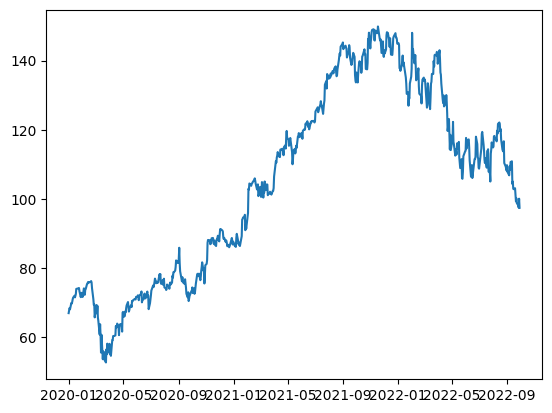

In [45]:
TICKER = 'GOOGL'
GOOGL = stock_data.loc[stock_data['Ticker'] == TICKER, ['Date', 'Adj_Close']].set_index('Date')
plt.plot(GOOGL)

In [50]:
ret_df = pd.DataFrame(np.log(GOOGL.diff().dropna()))
print('Avg. return: ', ret_df.mean())
print('Volatility: ', ret_df.std())
print('VaR99: ', np.abs(ret_df.quantile(.01)))
print('VaR95: ', np.abs(ret_df.quantile(.05)))

Avg. return:  Adj_Close   -0.135528
dtype: float64
Volatility:  Adj_Close    1.154381
dtype: float64
VaR99:  Adj_Close    3.481438
Name: 0.01, dtype: float64
VaR95:  Adj_Close    2.306333
Name: 0.05, dtype: float64


In [52]:
stock_df = stock_data.stack().reset_index().rename(columns={'level_1': 'Ticker'})
stock_df.columns = stock_df.columns.str.replace(' ', '_')
stock_df.head()

,level_0,Ticker,NaN
0,0,Date,2019-12-31 00:00:00
1,0,Ticker,GOOGL
2,0,Adj_Close,66.969498
3,0,Close,66.969498
4,0,High,67.032997


In [57]:
stock_df.to_parquet('Data/stock_df.parquet')

In [204]:
stock_df = pd.read_parquet('Data/stock_df.parquet')
stock_df.sort_values(by=['Date', 'Ticker']).tail(n=10)

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
3475,2022-10-06,AAPL,145.429993,145.429993,147.539993,145.220001,145.809998,68402200
3497,2022-10-06,GOOGL,101.419998,101.419998,102.930000,100.589996,100.680000,22324000
3498,2022-10-06,MSFT,246.789993,246.789993,250.339996,246.080002,247.929993,20239900
3476,2022-10-06,NFLX,240.020004,240.020004,244.279999,233.910004,236.679993,9188900
3499,2022-10-06,TSLA,238.130005,238.130005,244.580002,235.350006,239.440002,69298400
3477,2022-10-07,AAPL,140.089996,140.089996,143.100006,139.449997,142.539993,85859100
3500,2022-10-07,GOOGL,98.680000,98.680000,100.529999,98.300003,99.849998,27481800
3501,2022-10-07,MSFT,234.240005,234.240005,241.320007,233.169998,240.899994,37732400
3478,2022-10-07,NFLX,224.750000,224.750000,237.330002,224.279999,235.770004,9784800
3502,2022-10-07,TSLA,223.070007,223.070007,234.570007,222.020004,233.940002,83592300


In [59]:
START_DATE = stock_df.Date.max()
stock_data = yf.download(TICKERS, START_DATE)

[*********************100%***********************]  3 of 3 completed


In [60]:
print('new max: ', stock_data.index.max())
print('old_max: ', stock_df.Date.max())

new max:  2022-10-04 00:00:00
old_max:  2020-01-02 00:00:00


Aim here:
(1) Find a way to append anything that can be added after the latest ticker data.
(2) Flag if any previous data has been changed.

In [63]:
stock_df.Date.max()

Timestamp('2020-01-02 00:00:00')

In [91]:
this_date_range = pd.bdate_range(stock_df.Date.max(), date.today())
this_date_range[[0, len(this_date_range)-1]]

DatetimeIndex(['2020-01-02', '2022-10-05'], dtype='datetime64[ns]', freq=None)

In [84]:
if len(this_date_range) > 1:
    print('yes')
else:
    print('no')

no


In [65]:
sd_c.stock_data_df().head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2020-01-02,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
1,2020-01-02,MSFT,156.591995,160.619995,160.729996,158.330002,158.779999,22622100
2,2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
3,2020-01-03,GOOGL,68.075996,68.075996,68.687500,67.365997,67.400002,23408000
4,2020-01-03,MSFT,154.642181,158.619995,159.949997,158.059998,158.320007,21116200
...,...,...,...,...,...,...,...,...
2080,2022-10-03,MSFT,240.740005,240.740005,241.610001,234.660004,235.410004,28880400
2081,2022-10-03,TSLA,242.399994,242.399994,255.160004,241.009995,254.500000,98363500
2082,2022-10-04,GOOGL,101.639999,101.639999,101.839996,100.379997,100.440002,28821800
2083,2022-10-04,MSFT,248.880005,248.880005,250.360001,244.979996,245.089996,34866700


In [68]:
test_df = sd_c.stock_data_df()
test_df.head()

cols = test_df.columns

test_df \
    .sort_values(by=['Ticker', 'Date']) \
    .set_index(['Ticker', 'Date']) \
    .diff() \
    .reset_index() \
    [cols]


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2020-01-02,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,GOOGL,-0.358002,-0.358002,0.253502,0.041496,-0.020500,-3870000.0
2,2020-01-06,GOOGL,1.814507,1.814507,1.228500,0.184006,0.181496,23360000.0
3,2020-01-07,GOOGL,-0.135002,-0.135002,0.259003,2.028000,2.441505,-12438000.0
4,2020-01-08,GOOGL,0.496498,0.496498,0.417496,0.053497,-0.282005,984000.0
...,...,...,...,...,...,...,...,...
2080,2022-09-28,TSLA,4.869995,4.869995,0.329987,0.059998,-0.760010,-7260400.0
2081,2022-09-29,TSLA,-19.600006,-19.600006,-5.350006,-11.790009,-0.319977,22955800.0
2082,2022-09-30,TSLA,-2.959991,-2.959991,-8.079987,-3.309998,-16.610016,-10102800.0
2083,2022-10-03,TSLA,-22.850006,-22.850006,-20.410004,-21.460007,-11.649994,30845700.0
